# **Thư viện**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn import tree

import warnings
warnings.filterwarnings('ignore')

# **Đọc dữ liệu**

In [2]:
data = pd.read_excel(r'./1. Data/banking_credict_data.xlsx',index_col=0)

In [3]:
from copy import deepcopy
df = deepcopy(data) 

In [4]:
df.dropna(axis=1, how='all', inplace=True)
df = df[df.columns[0:8]]

In [5]:
df['Sex'] = df['Giới tính (0: Nam, 1: Nữ)']
df = df.drop('Giới tính (0: Nam, 1: Nữ)', 1)

df['Thu Nhập'] = df['Thu nhập (đơn vị triệu vnđ)']
df = df.drop('Thu nhập (đơn vị triệu vnđ)', 1)

df.index = df.index.set_names('No.')
df.columns = ['Default','Work status', 'Collateral' ,'Age','Marriage','Loan purpose','Sex','Income']

df.Sex = df.Sex.astype('object')

In [6]:
df.head(10)

,Default,Work status,Collateral,Age,Marriage,Loan purpose,Sex,Income
No.,,,,,,,,
1,1. Trả nợ đúng hạn.,1. Không chuyển việc trong vòng 2 năm.,4. Có đủ tài sản đảm bảo của bản thân,2: 30 < X ≤ 50,2: Đã kết hôn,2: Vay phục vụ SXKD,1,30
2,2. Trả nợ trễ hạn.,2. Chuyển việc 1 lần trong vòng 2 năm.,2. Có 1 phần tài sản đảm bảo,3: X > 50,3: Ly dị,1: Vay phục vụ nhu cầu đời sống,1,20
3,2. Trả nợ trễ hạn.,3. Chuyển việc 2 lần trong vòng 2 năm.,1. Không có tài sản đảm bảo,1: X ≤ 30,3: Ly dị,2: Vay phục vụ SXKD,0,9
4,2. Trả nợ trễ hạn.,3. Chuyển việc 2 lần trong vòng 2 năm.,1. Không có tài sản đảm bảo,2: 30 < X ≤ 50,2: Đã kết hôn,1: Vay phục vụ nhu cầu đời sống,0,22
5,2. Trả nợ trễ hạn.,3. Chuyển việc 2 lần trong vòng 2 năm.,2. Có 1 phần tài sản đảm bảo,3: X > 50,3: Ly dị,1: Vay phục vụ nhu cầu đời sống,0,10
6,1. Trả nợ đúng hạn.,1. Không chuyển việc trong vòng 2 năm.,4. Có đủ tài sản đảm bảo của bản thân,2: 30 < X ≤ 50,2: Đã kết hôn,2: Vay phục vụ SXKD,1,45
7,1. Trả nợ đúng hạn.,2. Chuyển việc 1 lần trong vòng 2 năm.,3. Có đủ tài sản đảm bảo được bảo lãnh,2: 30 < X ≤ 50,3: Ly dị,2: Vay phục vụ SXKD,1,44
8,1. Trả nợ đúng hạn.,1. Không chuyển việc trong vòng 2 năm.,3. Có đủ tài sản đảm bảo được bảo lãnh,2: 30 < X ≤ 50,2: Đã kết hôn,1: Vay phục vụ nhu cầu đời sống,1,42
9,2. Trả nợ trễ hạn.,3. Chuyển việc 2 lần trong vòng 2 năm.,1. Không có tài sản đảm bảo,3: X > 50,3: Ly dị,1: Vay phục vụ nhu cầu đời sống,1,15


# **Thống kê mô tả**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 1 to 270
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Default       270 non-null    object
 1   Work status   270 non-null    object
 2   Collateral    270 non-null    object
 3   Age           270 non-null    object
 4   Marriage      270 non-null    object
 5   Loan purpose  270 non-null    object
 6   Sex           270 non-null    object
 7   Income        270 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 19.0+ KB


In [8]:
numerical_features = ['Income']
print('Number of numerical features: ', len(numerical_features))

Number of numerical features:  1


In [9]:
categorical_features = [x for x in df.columns if (x not in numerical_features and x != 'Default')]
print('Number of numerical features: ', len(categorical_features))

Number of numerical features:  6


In [10]:
# Thống kê mô tả biến liên tục
df[numerical_features].describe()

,Income
count,270.000000
mean,30.659259
std,15.056603
min,4.000000
25%,18.250000
50%,30.000000
75%,42.000000
max,70.000000


In [11]:
# Thống kê mô tả biến rời rạc
df[categorical_features].describe()

,Work status,Collateral,Age,Marriage,Loan purpose,Sex
count,270,270,270,270,270,270
unique,3,4,3,3,2,2
top,1. Không chuyển việc trong vòng 2 năm.,4. Có đủ tài sản đảm bảo của bản thân,2: 30 < X ≤ 50,2: Đã kết hôn,2: Vay phục vụ SXKD,0
freq,110,76,120,145,155,143


In [12]:
df.value_counts(['Default'])

Default            
1. Trả nợ đúng hạn.    158
2. Trả nợ trễ hạn.     112
dtype: int64

    => Dữ liệu cân bằng.

# **Xây dựng hàm**

In [13]:
# Hàm vẽ đường ROC-AUC
def _plot_roc_curve(fpr, tpr, thres, auc):
    plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')

In [14]:
# Hàm encoding từ chữ sang số
def code_data(df,text):
    code_text = df[text]
    trafer_coding = []
    for i in code_text:
        if '4' in i[0]:
            i = 4
            trafer_coding.append(i)        
        elif '1' in i[0]:
            i = 1
            trafer_coding.append(i)
        elif '2' in i[0]:
            i = 2
            trafer_coding.append(i)
        elif '3' in i[0]:
            i = 3
            trafer_coding.append(i)
        elif '0' in i[0]:
            i = 0
            trafer_coding.append(i)  
    return trafer_coding


# **Xử lý dữ liệu**

# **Encoding cho biến phụ thuộc**
        1. Trả được nợ trễ hạn. => 0
        
        2. Trả được nợ đúng hạn. => 1

In [15]:
# Áp dụng hàm coding cho các cột
for i in range(len(df.columns)-2):
    df[df.columns[i]] = code_data(df,df.columns[i])

In [16]:
# Coding cho biến phụ thuộc
y_coding = []
for i in df[df.columns[0]]:
    if i == 1:
        i = 1
        y_coding.append(i)
    elif i == 2:
        i = 0
        y_coding.append(i)

df[df.columns[0]] = y_coding

In [17]:
df.describe()

,Default,Work status,Collateral,Age,Marriage,Loan purpose,Income
count,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,0.585185,1.851852,2.540741,1.97037,1.951852,1.574074,30.659259
std,0.493605,0.804435,1.142377,0.74615,0.679968,0.495401,15.056603
min,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000,4.000000
25%,0.000000,1.000000,2.000000,1.00000,1.000000,1.000000,18.250000
50%,1.000000,2.000000,3.000000,2.00000,2.000000,2.000000,30.000000
75%,1.000000,3.000000,4.000000,3.00000,2.000000,2.000000,42.000000
max,1.000000,3.000000,4.000000,3.00000,3.000000,2.000000,70.000000


In [18]:
df.head(10)

,Default,Work status,Collateral,Age,Marriage,Loan purpose,Sex,Income
No.,,,,,,,,
1,1,1,4,2,2,2,1,30
2,0,2,2,3,3,1,1,20
3,0,3,1,1,3,2,0,9
4,0,3,1,2,2,1,0,22
5,0,3,2,3,3,1,0,10
6,1,1,4,2,2,2,1,45
7,1,2,3,2,3,2,1,44
8,1,1,3,2,2,1,1,42
9,0,3,1,3,3,1,1,15


In [19]:
# Thiết lập thuộc tính biến độc lập
feature = df.columns[1:].to_list()
target=  [df.columns[0]]

# Gán biến phụ thuộc và biến độc lập
x = df[feature].values
y = df[target].values

In [20]:
print('Target: ', target)
print('Features: ', feature)

Target:  ['Default']
Features:  ['Work status', 'Collateral', 'Age', 'Marriage', 'Loan purpose', 'Sex', 'Income']


# **Dữ liệu khách hàng mới**

In [21]:
new_costumer = pd.read_excel(r'./1. Data/new_customer.xlsx')
df_new = deepcopy(new_costumer)

**Encoding dữ liệu mới**

In [22]:
df_new['Sex'] = df_new['Giới tính (0: Nam, 1: Nữ)']
df_new = df_new.drop('Giới tính (0: Nam, 1: Nữ)', 1)

df_new['Thu Nhập'] = df_new['Thu nhập (đơn vị triệu vnđ)']
df_new = df_new.drop('Thu nhập (đơn vị triệu vnđ)', 1)

df_new.index = df_new.index.set_names('No.')
df_new.columns = ['Work status', 'Collateral' ,'Age','Marriage','Loan purpose','Sex','Income']

In [23]:
# Áp dụng hàm coding cho các cột
for j in range(len(df_new.columns)-2):
    df_new[df_new.columns[j]] = code_data(df_new,df_new.columns[j])

In [24]:
x_pred = np.array(df_new)

# **Kiểm tra Correlation**

In [25]:
df.Sex = df.Sex.astype('int')

In [26]:
correlation = df.corr().iloc[1:,0].values
column_selected = [x for x in df.columns if (x != 'Default')]

features_importances_corr = pd.DataFrame({'FeatureName': df[column_selected].columns[0:len(df[column_selected])-1], 'Pearson Correlation with target': correlation})
features_importances_corr.reindex(features_importances_corr['Pearson Correlation with target'].abs().sort_values(ascending=False).index)

,FeatureName,Pearson Correlation with target
1,Collateral,0.775049
6,Income,0.647174
0,Work status,-0.623452
4,Loan purpose,0.612599
5,Sex,-0.396386
2,Age,0.299590
3,Marriage,-0.037576


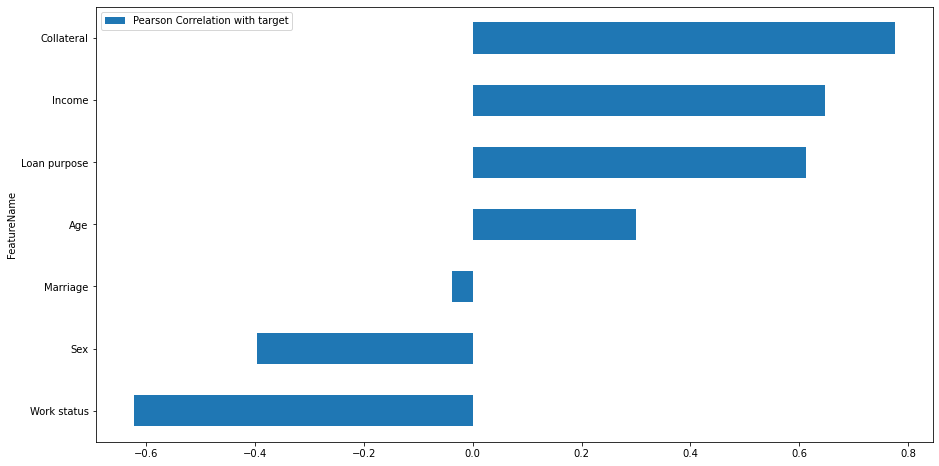

In [27]:
# Visualization Pearson Correlation
features_importances_corr.sort_values(by = ['Pearson Correlation with target']).plot(figsize=(15,8), x="FeatureName", y = "Pearson Correlation with target", kind="barh");

# **Các mô hình dự báo**

In [28]:
# Chia tệp huấn luyện và tệp kiểm tra
n_state = 42
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.8, test_size = 0.2, random_state=n_state)

# **Logistic regression**


In [29]:
# Xây dựng mô hình Logistic regression
LR_classifier = LogisticRegression(multi_class='multinomial',random_state=n_state)

# Đưa giá trị X_train và y_train vào mô hình Logistic regression
LR_classifier.fit(x_train, y_train.ravel())

# Dự báo giá trị biến phụ thuộc
y_pred = LR_classifier.predict(x_test)

print('Confusion matrix:')
print(confusion_matrix(y_test,y_pred),'\n')

print('Classification report:')
print(classification_report(y_test,y_pred))

print('Logistic Regression accuracy: ', round(accuracy_score(y_test, y_pred),4))

Confusion matrix:
[[19  1]
 [ 3 31]] 

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        20
           1       0.97      0.91      0.94        34

    accuracy                           0.93        54
   macro avg       0.92      0.93      0.92        54
weighted avg       0.93      0.93      0.93        54

Logistic Regression accuracy:  0.9259


In [30]:
# Hiệu chỉnh mô hình
accury_lr = 0
threshold = 0
for i in np.arange(0.1, 1.0, 0.05):
    LR_classifier = LogisticRegression(multi_class='multinomial',penalty='l2', C=i,random_state=n_state)
    LR_classifier.fit(x_train, y_train.ravel())
    y_pred = LR_classifier.predict(x_test)
    
    # logic
    accury_results = round(accuracy_score(y_test, y_pred),4)
    if accury_results > accury_lr:
        accury_lr = accury_results
        threshold = i
        threshold = round(threshold,2)

In [31]:
print(f'Với threshold = {threshold} thì mô hình Logistic Regression có accuracy = {accury_lr}')

Với threshold = 0.55 thì mô hình Logistic Regression có accuracy = 0.9444


In [32]:
# Xây dựng mô hình Logistic regression
LR_classifier = LogisticRegression(multi_class='multinomial',penalty='l2', C=threshold,random_state=n_state)

# Đưa giá trị X_train và y_train vào mô hình Logistic regression
LR_classifier.fit(x_train, y_train.ravel())

# Dự báo giá trị biến phụ thuộc
y_pred = LR_classifier.predict(x_test)

# In các thông số quan trọng

# Ma trận bối rối
print('Confusion matrix:')
print(confusion_matrix(y_test,y_pred),'\n')

# Các chỉ số báo cáo
print('Classification report:')
print(classification_report(y_test,y_pred))

# Tỉ lệ chính xác accuracy
print('Logistic Regression accuracy: ', round(accuracy_score(y_test, y_pred),4))

Confusion matrix:
[[20  0]
 [ 3 31]] 

Classification report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        20
           1       1.00      0.91      0.95        34

    accuracy                           0.94        54
   macro avg       0.93      0.96      0.94        54
weighted avg       0.95      0.94      0.95        54

Logistic Regression accuracy:  0.9444


        Thay đổi threshold đã làm tăng accuracy từ 0.9259 tăng lên 0.9444

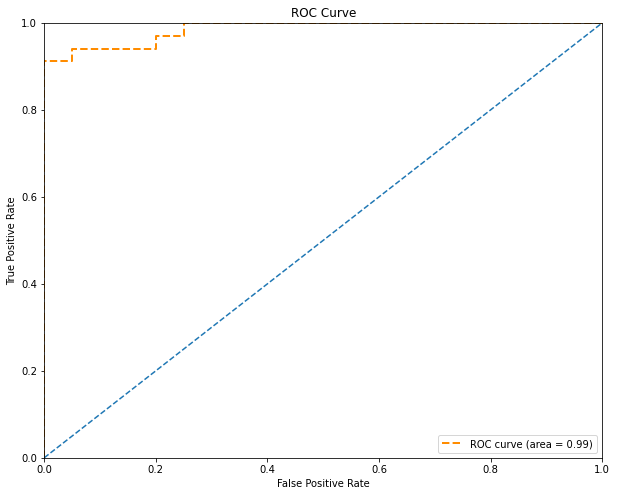

In [33]:
# ROC
y_pred_prob_test = LR_classifier.predict_proba(x_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)

In [34]:
correlation = df.corr().iloc[1:,0].values
column_selected = [x for x in df.columns if (x != 'Default')]

features_importances_corr = pd.DataFrame({'FeatureName': df[column_selected].columns[0:len(df[column_selected])-1], 'Pearson Correlation with target': correlation})
features_importances_corr.reindex(features_importances_corr['Pearson Correlation with target'].abs().sort_values(ascending=False).index)

,FeatureName,Pearson Correlation with target
1,Collateral,0.775049
6,Income,0.647174
0,Work status,-0.623452
4,Loan purpose,0.612599
5,Sex,-0.396386
2,Age,0.299590
3,Marriage,-0.037576


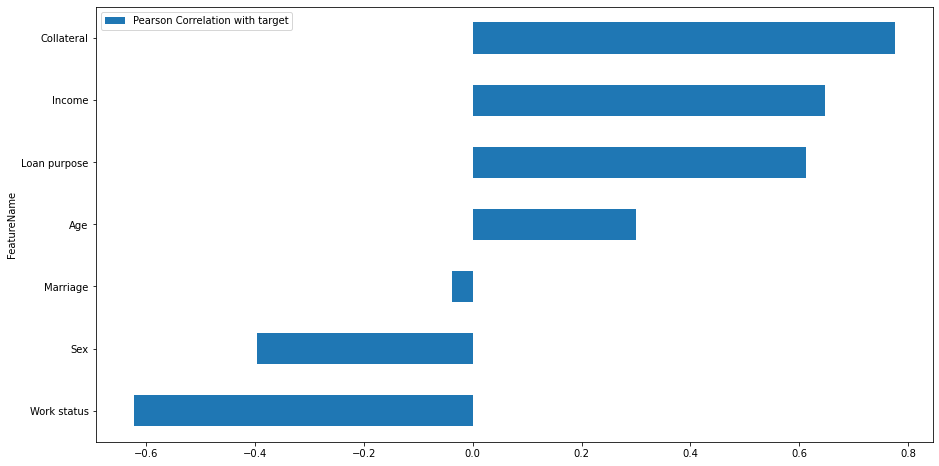

In [35]:
# # Visualization Pearson Correlation
features_importances_corr.sort_values(by = ['Pearson Correlation with target']).plot(figsize=(15,8), x="FeatureName", y = "Pearson Correlation with target", kind="barh");

**Dự báo Logistic Regression với bộ dữ liệu khách hàng mới**

In [36]:
y_new = LR_classifier.predict(x_pred)
y_new = pd.DataFrame(y_new.tolist(),index=df_new.index)
y_new.columns = ['Default']

lr_predict = pd.concat([y_new,df_new],axis=1)

In [37]:
lr_predict.head()

,Default,Work status,Collateral,Age,Marriage,Loan purpose,Sex,Income
No.,,,,,,,,
0,1,1,4,2,2,2,0,57
1,0,2,2,3,3,1,1,20
2,0,3,1,3,3,1,1,12
3,1,1,4,2,2,2,0,38
4,0,3,1,1,1,1,1,20


# **Cây quyết định.**

In [38]:
# Xây dựng mô hình Decision Tree
DT_classifier = DecisionTreeClassifier(random_state=n_state)
# DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(x_train, y_train.ravel())

# Dự báo giá trị biến phụ thuộc
y_pred = DT_classifier.predict(x_test)

# In các thông số quan trọng

# Ma trận bối rối
print(f'Confusion Matrix:\n{confusion_matrix(y_test,y_pred)}\n')

# Báo cáo phân loại
print(f'Report model:\n{classification_report(y_test,y_pred)}')

# Tỉ lệ chính xác accuracy
print('Decision Tree accuracy: ', round(accuracy_score(y_test, y_pred),4))

Confusion Matrix:
[[17  3]
 [ 2 32]]

Report model:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        20
           1       0.91      0.94      0.93        34

    accuracy                           0.91        54
   macro avg       0.90      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54

Decision Tree accuracy:  0.9074


In [39]:
# Hiệu chỉnh mô hình
accury_dt = 0
depth = 0
for i in range(1,50):
    DT_classifier = DecisionTreeClassifier(max_depth=i,random_state=n_state)
    DT_classifier.fit(x_train, y_train.ravel())
    y_pred = DT_classifier.predict(x_test)
    accury_results = round(accuracy_score(y_test, y_pred),4)
    if accury_results > accury_dt:
        accury_dt = accury_results
        depth = i


In [40]:
print(f'Với max depth = {depth} thì mô hình Decision Tree có accuracy = {accury_dt}')

Với max depth = 6 thì mô hình Decision Tree có accuracy = 0.9259


In [41]:
# Xây dựng mô hình Decision Tree
DT_classifier = DecisionTreeClassifier(max_depth=depth, random_state=n_state)
DT_classifier.fit(x_train, y_train.ravel())

# Dự báo giá trị biến phụ thuộc
y_pred = DT_classifier.predict(x_test)

# In các thông số quan trọng

# Ma trận bối rối
print(f'Confusion Matrix:\n{confusion_matrix(y_test,y_pred)}\n')

# Báo cáo phân loại
print(f'Report model:\n{classification_report(y_test,y_pred)}')

# Tỉ lệ chính xác accuracy
print('Decision Tree accuracy: ', round(accuracy_score(y_test, y_pred),4))

Confusion Matrix:
[[17  3]
 [ 1 33]]

Report model:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        20
           1       0.92      0.97      0.94        34

    accuracy                           0.93        54
   macro avg       0.93      0.91      0.92        54
weighted avg       0.93      0.93      0.93        54

Decision Tree accuracy:  0.9259


In [42]:
# Tạo dataframe chứa kết quả dự báo và kết quả thực tế
y_test_reshape = np.squeeze(y_test)

pre_table = pd.DataFrame({'y_test': y_test_reshape,
              'y_predict': y_pred})

x_test_table = pd.DataFrame(x_test,columns=feature)

x_test_table['y_test'] = pre_table['y_test']
x_test_table['y_predict'] = pre_table['y_predict']

In [43]:
x_test_table.head()

,Work status,Collateral,Age,Marriage,Loan purpose,Sex,Income,y_test,y_predict
0,1,4,2,1,2,0,31,1,1
1,1,4,2,2,1,0,33,1,1
2,3,1,1,1,1,1,18,0,0
3,3,1,1,3,1,1,14,0,0
4,2,1,1,3,1,1,16,0,0


In [44]:
# In ra các vị trí dự báo sai
wrong_list = []
wrong_list_index = []

for i in range(len(x_test_table)):
    if x_test_table.iloc[i][7] != x_test_table.iloc[i][8]:
        wrong_list.append(x_test_table.iloc[i][:7].tolist())

for k in range(len(wrong_list)):
    for j in range(len(df)):
        if wrong_list[k] == df.iloc[j][1:].tolist():
            # print(f'Vị trí mô hình dự báo sai: {j}') 
            wrong_list_index.append(j)

In [45]:
wrong_list_index = sorted(wrong_list_index)
for w in wrong_list_index:
    print(f'Vị trí mô hình dự báo sai ở dòng thứ {w+1}:\n{df.iloc[w]}\n')

Vị trí mô hình dự báo sai ở dòng thứ 25:
Default          1
Work status      2
Collateral       2
Age              1
Marriage         2
Loan purpose     2
Sex              0
Income          29
Name: 25, dtype: int64

Vị trí mô hình dự báo sai ở dòng thứ 209:
Default          0
Work status      1
Collateral       1
Age              1
Marriage         3
Loan purpose     1
Sex              0
Income          17
Name: 209, dtype: int64

Vị trí mô hình dự báo sai ở dòng thứ 227:
Default          0
Work status      2
Collateral       1
Age              3
Marriage         2
Loan purpose     1
Sex              0
Income          12
Name: 227, dtype: int64

Vị trí mô hình dự báo sai ở dòng thứ 245:
Default          0
Work status      3
Collateral       1
Age              2
Marriage         3
Loan purpose     1
Sex              0
Income          37
Name: 245, dtype: int64



=> Sai ba thuộc tính sẽ đưa ra sai kết quả

In [46]:
# text_representation = tree.export_text(DT_classifier,feature_names=feature)
# print(text_representation)

Note: Class 0 is late-payment and class 1 is on-time-payment


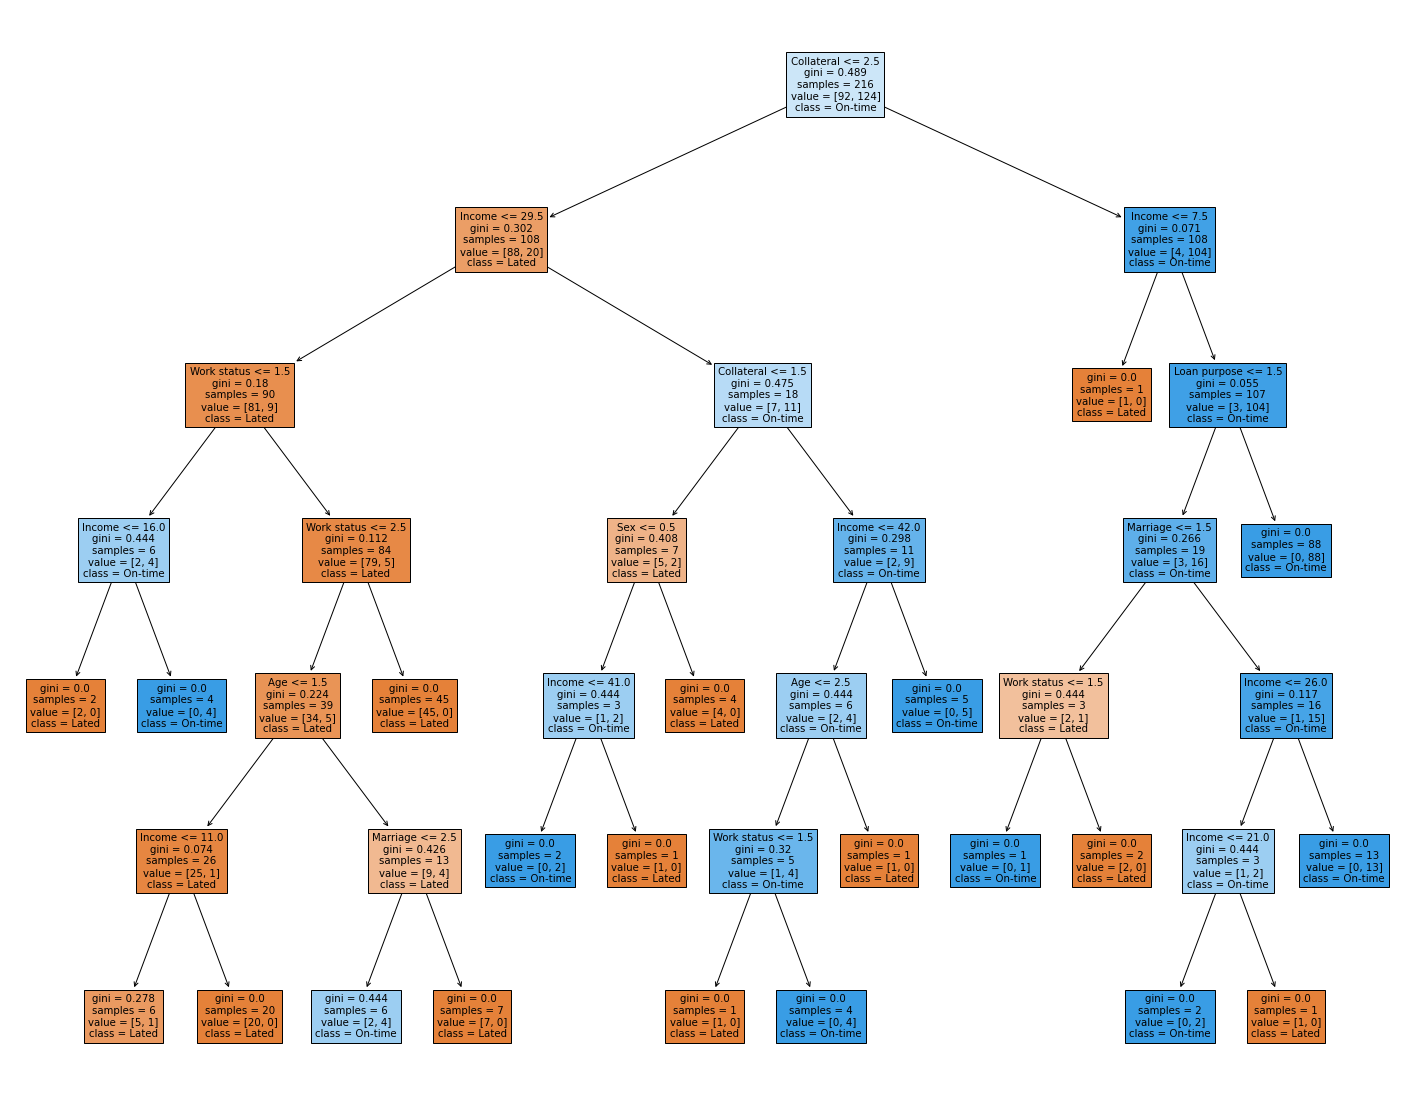

In [47]:
# Trực quan hóa cây 
print('Note: Class 0 is late-payment and class 1 is on-time-payment')
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DT_classifier, 
                   feature_names=feature,  
                   class_names=['Lated','On-time'],
                   filled=True)

In [48]:
# Các biến quan trọng
importance_dt = DT_classifier.feature_importances_
features_importances_dt = pd.DataFrame({'FeatureName': df.columns[1:len(df.columns)], 'Decision Tree Feature Importance': importance_dt})
features_importances_dt.sort_values(by=['Decision Tree Feature Importance'], ascending=False)

,FeatureName,Decision Tree Feature Importance
1,Collateral,0.668919
6,Income,0.162360
0,Work status,0.076496
3,Marriage,0.046557
2,Age,0.022933
5,Sex,0.015043
4,Loan purpose,0.007692


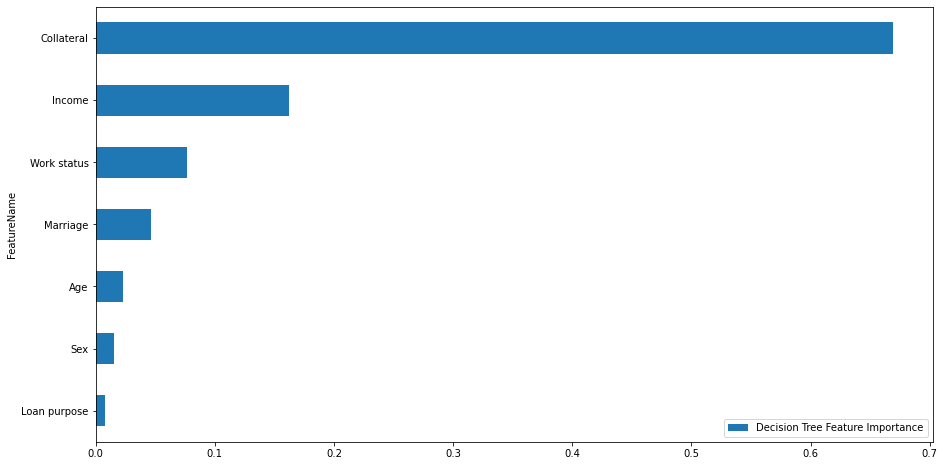

In [49]:
# Trực quan hóa các biến quan trọng
features_importances_dt.sort_values("Decision Tree Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Decision Tree Feature Importance"], kind="barh");

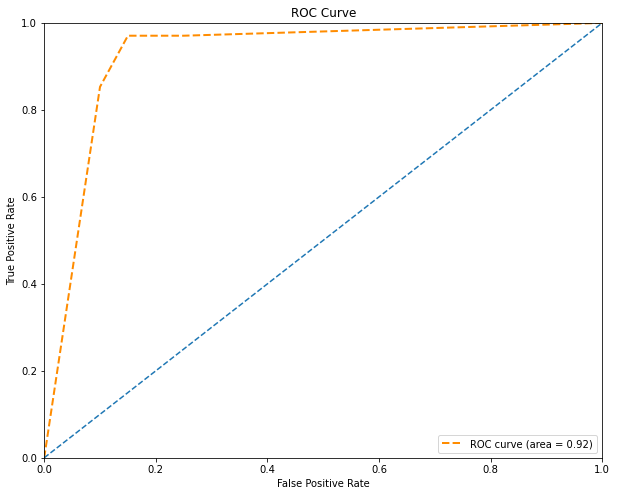

In [50]:
# ROC
y_pred_prob_test = DT_classifier.predict_proba(x_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)

**Dự báo Decision Tree với bộ dữ liệu khách hàng mới**

In [51]:
y_dt_new = DT_classifier.predict(x_pred)
y_dt_new = pd.DataFrame(y_dt_new.tolist(),index=df_new.index)
y_dt_new.columns = ['Default']

dt_predict = pd.concat([y_dt_new,df_new],axis=1)

In [52]:
dt_predict.head()

,Default,Work status,Collateral,Age,Marriage,Loan purpose,Sex,Income
No.,,,,,,,,
0,1,1,4,2,2,2,0,57
1,0,2,2,3,3,1,1,20
2,0,3,1,3,3,1,1,12
3,1,1,4,2,2,2,0,38
4,0,3,1,1,1,1,1,20


# **Rừng ngẫu nhiên**

In [53]:
# Xây dựng mô hình Random Forest
RF_classifier = RandomForestClassifier(random_state=n_state)
RF_classifier.fit(x_train, y_train.ravel())

# Dự báo giá trị biến phụ thuộc
y_pred = RF_classifier.predict(x_test)

# Ma trận bối rối
print(f'Confusion Matrix:\n{confusion_matrix(y_test,y_pred)}\n')

# Báo cáo phân loại
print(f'Report model:\n{classification_report(y_test,y_pred)}')

# Tỉ lệ chính xác accuracy
print('Random Forest accuracy: ', round(accuracy_score(y_test, y_pred),4))

Confusion Matrix:
[[20  0]
 [ 2 32]]

Report model:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        20
           1       1.00      0.94      0.97        34

    accuracy                           0.96        54
   macro avg       0.95      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54

Random Forest accuracy:  0.963


In [54]:
# Hiệu chỉnh mô hình
accury_rf = 0
depth = 0
for i in range(1,50):
    RF_classifier = RandomForestClassifier(bootstrap=True, criterion='gini',
    max_depth=i, max_features='auto', min_samples_leaf=1, min_samples_split=2,
    min_weight_fraction_leaf=0.0,n_jobs=1, random_state=n_state)

    RF_classifier.fit(x_train, y_train.ravel())

    y_pred = RF_classifier.predict(x_test)

    accury_results = round(accuracy_score(y_test, y_pred),4)
    if accury_results > accury_rf:
        accury_rf = accury_results
        depth = i

print(f'Với max depth = {depth} thì mô hình Random Forest có accuracy = {accury_rf}')

Với max depth = 8 thì mô hình Random Forest có accuracy = 0.963


In [55]:
# Xây dựng mô hình Random Forest
RF_classifier = RandomForestClassifier(random_state=n_state,max_depth=depth)
RF_classifier.fit(x_train, y_train.ravel())

# Dự báo giá trị biến phụ thuộc
y_pred = RF_classifier.predict(x_test)

# Ma trận bối rối
print(f'Confusion Matrix:\n{confusion_matrix(y_test,y_pred)}\n')

# Báo cáo phân loại
print(f'Report model:\n{classification_report(y_test,y_pred)}')

# Tỉ lệ chính xác accuracy
print('Random Forest accuracy: ', round(accuracy_score(y_test, y_pred),4))

Confusion Matrix:
[[20  0]
 [ 2 32]]

Report model:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        20
           1       1.00      0.94      0.97        34

    accuracy                           0.96        54
   macro avg       0.95      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54

Random Forest accuracy:  0.963


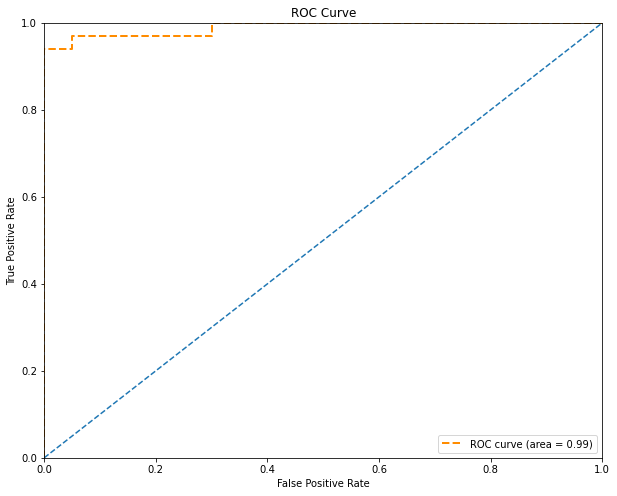

In [56]:
# ROC
y_pred_prob_test = RF_classifier.predict_proba(x_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)

In [57]:
# Xây dựng dataFrame so sánh giữa dữ liệu thực tế và dữ liệu dự báo 
y_test_reshape = np.squeeze(y_test)

pre_table = pd.DataFrame({'y_test': y_test_reshape,
              'y_predict': y_pred})

x_test_table = pd.DataFrame(x_test,columns=feature)

x_test_table['y_test'] = pre_table['y_test']
x_test_table['y_predict'] = pre_table['y_predict']

In [58]:
x_test_table.head()

,Work status,Collateral,Age,Marriage,Loan purpose,Sex,Income,y_test,y_predict
0,1,4,2,1,2,0,31,1,1
1,1,4,2,2,1,0,33,1,1
2,3,1,1,1,1,1,18,0,0
3,3,1,1,3,1,1,14,0,0
4,2,1,1,3,1,1,16,0,0


In [59]:
# Tìm ra các dòng dữ liệu dự báo sai với thực tế
wrong_list = []
wrong_list_index = []

for i in range(len(x_test_table)):
    if x_test_table.iloc[i][7] != x_test_table.iloc[i][8]:
        wrong_list.append(x_test_table.iloc[i][:7].tolist())

for k in range(len(wrong_list)):
    for j in range(len(df)):
        if wrong_list[k] == df.iloc[j][1:].tolist():
            # print(f'Vị trí mô hình dự báo sai: {j}') 
            wrong_list_index.append(j)

In [60]:
wrong_list_index = sorted(wrong_list_index)
for w in wrong_list_index:
    print(f'Vị trí mô hình dự báo sai ở dòng thứ {w+1}:\n{df.iloc[w]}\n')

Vị trí mô hình dự báo sai ở dòng thứ 43:
Default          1
Work status      2
Collateral       1
Age              2
Marriage         1
Loan purpose     2
Sex              1
Income          15
Name: 43, dtype: int64

Vị trí mô hình dự báo sai ở dòng thứ 47:
Default          1
Work status      2
Collateral       2
Age              3
Marriage         1
Loan purpose     2
Sex              1
Income          16
Name: 47, dtype: int64



In [61]:
# Các biến quan trọng
importance_rf = RF_classifier.feature_importances_
features_importances_rf = pd.DataFrame({'FeatureName': feature, 'Random Forest Feature Importance': importance_rf})
features_importances_rf.sort_values(by=['Random Forest Feature Importance'], ascending=False)

,FeatureName,Random Forest Feature Importance
1,Collateral,0.326468
6,Income,0.282443
0,Work status,0.148481
4,Loan purpose,0.113922
3,Marriage,0.053955
2,Age,0.051038
5,Sex,0.023692


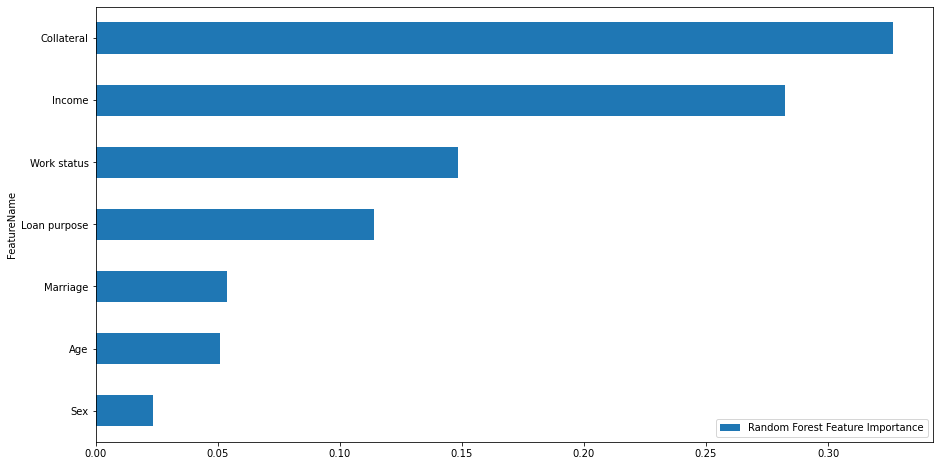

In [62]:
# Trực quan hóa các biến quan trọng
features_importances_rf.sort_values("Random Forest Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Random Forest Feature Importance"], kind="barh");

**Dự báo trên bộ dữ liệu khách hàng mới**

In [63]:
y_rf_new = DT_classifier.predict(x_pred)
y_rf_new = pd.DataFrame(y_rf_new.tolist(),index=df_new.index)
y_rf_new.columns = ['Default']

rf_predict = pd.concat([y_rf_new,df_new],axis=1)

In [64]:
rf_predict.head()

,Default,Work status,Collateral,Age,Marriage,Loan purpose,Sex,Income
No.,,,,,,,,
0,1,1,4,2,2,2,0,57
1,0,2,2,3,3,1,1,20
2,0,3,1,3,3,1,1,12
3,1,1,4,2,2,2,0,38
4,0,3,1,1,1,1,1,20


# **So sánh kết quả dự báo giữa 3 mô hình**

In [65]:
# Tạo dataframe 
compare = pd.DataFrame({'Logistic regression': lr_predict.Default,
                        'Desition tree': dt_predict.Default,
                        'Random forest': rf_predict.Default})

In [66]:
compare.head()

In [67]:
# Tìm ra các dòng có sự khác biệt về kết quả dự báo giữa 3 mô hình.
list_predict_wrong = []
for i in range(0,len(compare)):
    if (compare.iloc[i,0] != compare.iloc[i,1]) or (compare.iloc[i,0] != compare.iloc[i,2]):
        list_predict_wrong.append(i)

In [68]:
compare.loc[list_predict_wrong]

,Logistic regression,Desition tree,Random forest
No.,,,
8,1,0,0
13,1,0,0
37,0,1,1
